First Notebook

In [1]:
import pandas
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def parseArray(array):
    parsedArray = array[1:-1].replace('\n','').replace(' ','').split(',')
    parsedArray = filter(None,parsedArray)
    return np.array(list(parsedArray)).astype(float)

def filterByDate(samples,date):
    return samples.query('expirement_date == %s' % date)

def filterByPeaks(filteredSamples):
    pandas.options.mode.chained_assignment = None
    
    # -1 -> error with radial profile
    # -2 -> no peaks
    # -3 -> error with peaks
    # -4 -> many peaks
    
    newSamples = filteredSamples.query('peaks != "-1" and peaks != "-2" and peaks != "-3"')
    # newSamples = newSamples.query('num_seg_pxls > 0')
    
    newSamples.peaks = newSamples['peaks'].apply(lambda x: parseArray(x)[0])
    return newSamples

In [3]:
samples = pandas.read_csv('./Data/peak_distances_2.csv')

fields = ['time','num_seg_pxls','stack_data_mean','image_intensity_mean','peaks']
dates = np.unique(samples['expirement_date'].to_numpy())

In [4]:
def getAverage(samples,bin_interval,bin_width):
    averageValues = []

    for bound in range(200,400-bin_width,bin_interval):
        bin = samples.query('peaks > {min} and peaks < {max}'.format(
            min = bound,
            max = bound + bin_width
        ))

        total = 0
        for row in bin.iterrows():
            total += int(row[1]['num_seg_pxls'])
        size = bin.shape[0]

        averageValues.append( (total,size) )
    
    return averageValues

def plotValues2(features,bin_interval,bin_width):
    fig = plt.gcf()

    plt.figure(figsize=(10,10))
    plt.xlabel('Peaks')
    plt.ylabel('Avg # of Segmented Pixels')
    plt.title('Avg # of Segmented Pixels by Peak Distance')

    r = range(200,400-bin_width,bin_interval)
    plt.xticks(r,map(lambda a: '{min}-{max}'.format(
            min = a,
            max = a + bin_width
        ),r),rotation=75)
    
    plt.grid()

    
    averages = list(map(lambda x: 0 if not x[1] else x[0] / x[1], features))
    sizes = list(map(lambda x: x[1], features))

    plt.plot(r,averages)
    plt.plot(r,sizes)


    # fig.savefig('%s.png' % ('./Avg Seg Pxls/'+str(date)))

In [10]:
def plotValues(features,bin_interval,bin_width):
    fig,ax = plt.subplots(figsize=(10,10))
    ax2 = ax.twinx()

    r = range(200,400-bin_width,bin_interval)
    averages = list(map(lambda x: 0 if not x[1] else x[0] / x[1], features))
    sizes = list(map(lambda x: x[1], features))

    ax.plot(r,averages)
    ax.set_ylabel('Avg # of Segmented Pixels')

    ax2.plot(r,sizes)
    ax2.set_ylabel('Density')

    plt.sca(ax)

    plt.title('Avg Features by Binned Peak Distance')

    plt.xlabel('Peaks')
    plt.xticks(r,map(lambda a: '{min}-{max}'.format(
            min = a,
            max = a + bin_width
        ),r),rotation=75)
    
    plt.grid()

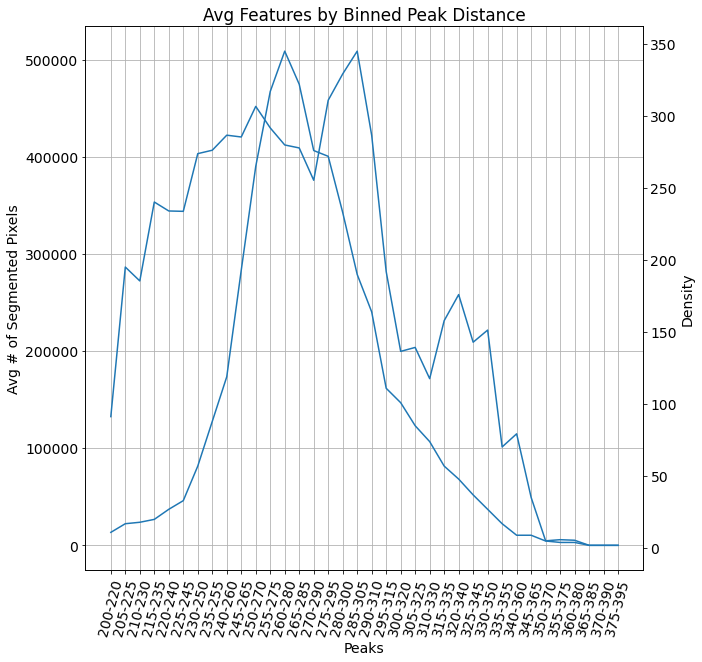

In [11]:
plt.rcParams.update({'font.size':14})

bin_interval = 5
bin_width = 20

# filteredSamples = filterByDate(filterByPeaks(samples),dates[0])
filteredSamples = filterByPeaks(samples)
features = getAverage(filteredSamples,bin_interval,bin_width)

plotValues(features,bin_interval,bin_width)

<Figure size 432x288 with 0 Axes>

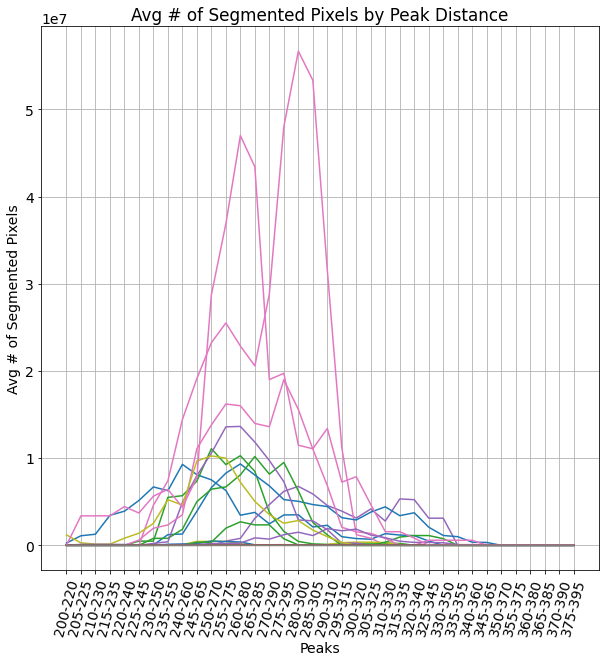

In [7]:
plt.rcParams.update({'font.size':14})

bin_interval = 5
bin_width = 20

filteredSamples = filterByPeaks(samples)

fig = plt.gcf()

plt.figure(figsize=(10,10))
plt.xlabel('Peaks')
plt.ylabel('Avg # of Segmented Pixels')
plt.title('Avg # of Segmented Pixels by Peak Distance')

r = range(200,400-bin_width,bin_interval)
plt.xticks(r,map(lambda a: '{min}-{max}'.format(
            min = a,
            max = a + bin_width
        ),r),rotation=75)

plt.grid()

for date in dates:
    avg = getAverage(filterByDate(filteredSamples,date),bin_interval,bin_width)
    plt.plot(r,avg)

In [8]:
# plt.rcParams.update({'font.size':14})

# filteredSamples = filterByPeaks(samples)

# for date in dates:
# # for date in [dates[0],dates[1],dates[2]]:
#     fig = plt.gcf()

#     plt.figure(figsize=(10,10))
#     plt.xlabel('Peaks')
#     plt.ylabel('Avg # of Segmented Pixels')
#     plt.title('Avg # of Segmented Pixels by Peak Distance')

#     plt.plot(getAverage(filteredSamples,date,10))

#     fig.savefig('%s.png' % ('./Avg Seg Pxls/'+str(date)))
#     del fig

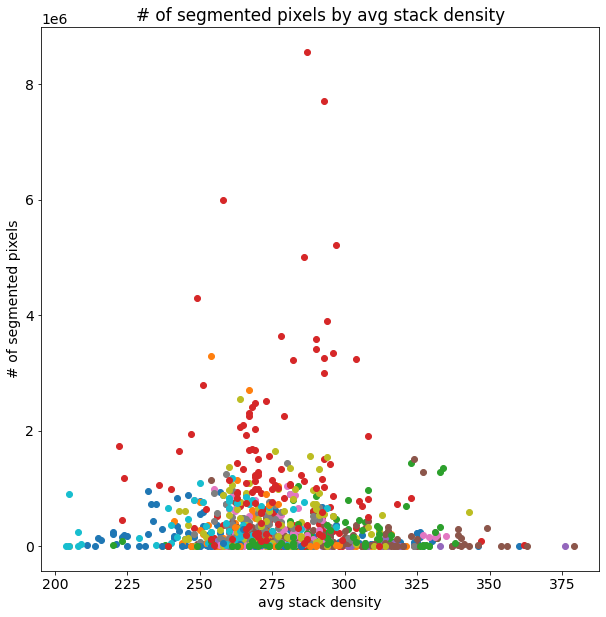

In [9]:
plt.rcParams.update({'font.size':14})

filteredSamples = filterByPeaks(samples)
plt.figure(figsize=(10,10))

field1 = 'peaks'
field2 = 'num_seg_pxls'

plt.xlabel('avg stack density')
plt.ylabel('# of segmented pixels')
plt.title('# of segmented pixels by avg stack density')

for date in dates:
    currentSamples = filterByDate(filteredSamples,date)

    plt.scatter(x=currentSamples[field1],y=currentSamples[field2])